In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


- Un vistazo rápido a los datos muestra la variable dependiente o objetivo Attrition.

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
display(df.iloc[0])

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [6]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [7]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,2.73,"6,502.93","14,313.10",2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,"4,707.96","7,117.79",2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,"1,009.00","2,094.00",0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,"2,911.00","8,047.00",1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,3.00,"4,919.00","14,235.50",2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,4.00,"8,379.00","20,461.50",4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,4.00,"19,999.00","26,999.00",9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


Un par de observaciones que destacaron al revisar la información estadística básica mostrada por **describe**:

- **EmployeeCount:** Todos los valores son 1. Aporta poca información, por lo que se puede eliminar esta columna.  
- **EmployeeNumber:** Es un conteo secuencial. Aporta poca información, por lo que se puede eliminar esta columna.  
- **StandardHours:** Todos los valores son 80. Aporta poca información, por lo que se puede eliminar esta columna.

In [13]:
# Lista con los nombres de las columnas numericas
num_col = list(df.describe().columns)
# Lista con los nombres de las columnas que no aparecen en num_col
col_categorical = list(set(df.columns).difference(num_col))
# Lista de las columnas que queremos eliminar por su nombre
remove_list = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
# Almacenamos las columnas numericas si no se encuentran en la lista de las que queremos eliminar
col_numerical = [e for e in num_col if e not in remove_list] 

print(len(num_col))
print(len(col_numerical))
print(len(col_categorical))

26
23
9


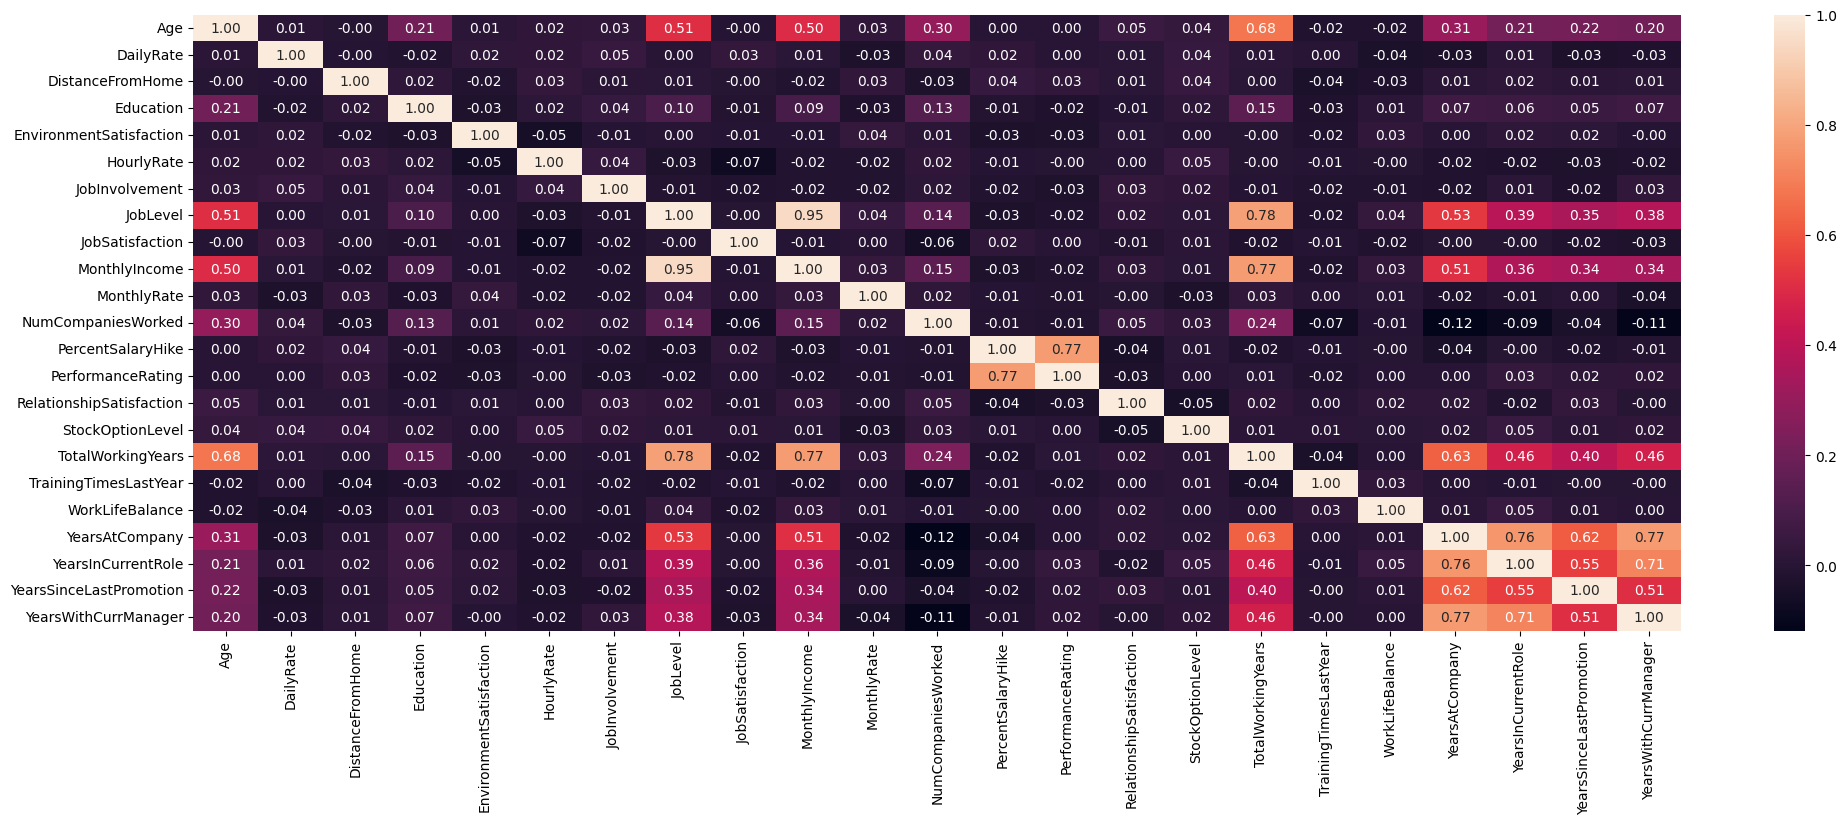

In [ ]:
df[col_numerical].corr()
plt.figure(figsize=(24,8))
sns.heatmap(df[col_numerical].corr(), annot=True, fmt=".2f")

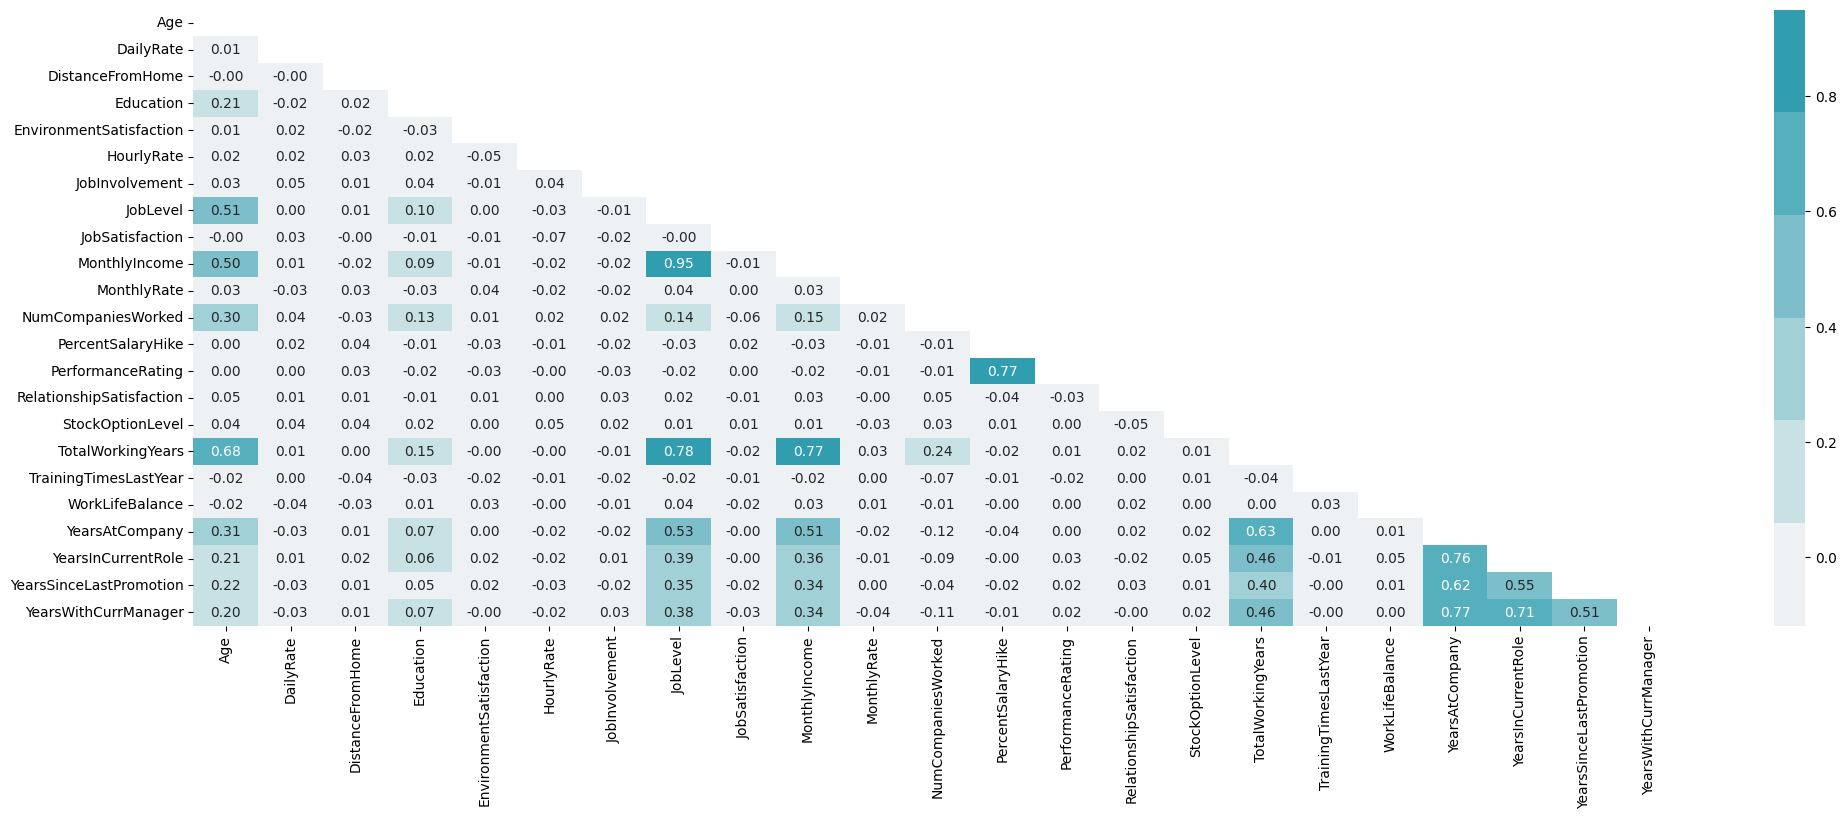

In [17]:
plt.figure(figsize=(24,8))

# Mask for the upper triangle
mask = np.zeros_like(df[col_numerical].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(10, 220, as_cmap=True)
cmap = sns.light_palette((210, 90, 60), input="husl")

# Heatmap with mask
sns.heatmap(df[col_numerical].corr(), mask=mask, cmap=cmap, annot=True, fmt=".2f");

Hay algunos puntos a tener en cuenta a partir de la matriz de correlación.  
El coeficiente de correlación es relativamente alto. Utilicé **0.7** como mi umbral de referencia; es decir, valores superiores a 0.7 indican una correlación estrecha.  
Esta elección es subjetiva, pero uso 0.7 como guía para identificar relaciones que vale la pena investigar más a fondo.

**Por ejemplo:**

- Ingreso mensual (**Monthly Income**) y nivel de puesto (**Job Level**)  
- Años totales de trabajo (**Total Working Years**) y nivel de puesto (**Job Level**)  
- Años totales de trabajo (**Total Working Years**) e ingreso mensual (**Monthly Income**)  
- Calificación de desempeño (**Performance Rating**) y porcentaje de aumento salarial (**Percent Salary Hike**)  
- Años en el puesto actual (**Years in Current Role**) y años en la empresa (**Years at Company**)  
- Años con el gerente actual (**Years with Current Manager**) y años en la empresa (**Years at Company**)  
- Años con el gerente actual (**Years with Current Manager**) y años en el puesto actual (**Years in Current Role**)


In [18]:
col_categorical

['Department',
 'EducationField',
 'JobRole',
 'OverTime',
 'MaritalStatus',
 'Gender',
 'BusinessTravel',
 'Attrition',
 'Over18']

In [19]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
attrion_col_num = {'Yes': 0, 'No': 1}
df['Attrition_num'] = df['Attrition'].map(attrion_col_num)

📌 **Punto a tener en cuenta:**

- Realiza **One Hot Encoding antes** de dividir los datos en *train* y *test*.  
  Esto está bien, ya que solo estás transformando los datos y **no hay fuga de información** (*data leakage*).

- Realiza el **procesamiento de datos después** de la división *train-test*,  
  porque operaciones como la **estandarización (standardization)** aprenden del conjunto de datos  
  calculando métricas como la media y la desviación estándar.


In [24]:
col_categorical.remove('Attrition')
col_categorical

['Department',
 'EducationField',
 'JobRole',
 'OverTime',
 'MaritalStatus',
 'Gender',
 'BusinessTravel',
 'Over18']

In [25]:
df_cat = pd.get_dummies(df[col_categorical])
df_cat.head()

,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Over18_Y
0,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,True,True
1,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True
2,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True
3,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,True
4,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True


## 🧩 ¿Qué hace `pd.get_dummies()`?

La función `pd.get_dummies()` de **Pandas** realiza una **codificación One-Hot Encoding** de las variables categóricas.  
Esto significa que convierte las categorías (valores de texto) en **columnas numéricas binarias (0 o 1)**  
para que los algoritmos de Machine Learning puedan procesarlas.

---

In [26]:
X = pd.concat([df[col_numerical], df_cat], axis= 1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_No,OverTime_Yes,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Gender_Female,Gender_Male,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Over18_Y
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,True,True
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,True
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,True,False,False,True,False,True
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True


In [27]:
y = df['Attrition_num']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Attrition_num, dtype: int64

In [28]:
y.value_counts()

Attrition_num
1    1233
0     237
Name: count, dtype: int64

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

## Arbol de decision

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [33]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       984

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [34]:
confusion_matrix(y_train, clf.predict(X_train))

array([[192,   0],
       [  0, 984]])

In [35]:
accuracy_score(y_test, clf.predict(X_test))

0.7721088435374149

In [36]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.26      0.27      0.26        45
           1       0.87      0.86      0.87       249

    accuracy                           0.77       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.77      0.77      0.77       294



In [37]:
confusion_matrix(y_test, clf.predict(X_test))

array([[ 12,  33],
       [ 34, 215]])

In [39]:

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score
def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    '''
    v0.1 Follow the scikit learn library format in terms of input
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_train)
    if train:
        '''
        training performance
        '''
        res = clf.predict(X_train)
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, 
                                                                res)))
        print("Classification Report: \n {}\n".format(classification_report(y_train, 
                                                                            res)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, 
                                                                  res)))
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), 
                                                      lb.transform(res))))

        #res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        #print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        #print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        res_test = clf.predict(X_test)
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, 
                                                                res_test)))
        print("Classification Report: \n {}\n".format(classification_report(y_test, 
                                                                            res_test)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, 
                                                                  res_test)))   
        print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_test), 
                                                      lb.transform(res_test))))
        
print_score(clf, X_train, X_test, y_train, y_test, train=True)
print_score(clf, X_train, X_test, y_train, y_test, train=False)


Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       192
           1       1.00      1.00      1.00       984

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix: 
 [[192   0]
 [  0 984]]

ROC AUC: 1.0000

Test Result:

accuracy score: 0.7721

Classification Report: 
               precision    recall  f1-score   support

           0       0.26      0.27      0.26        45
           1       0.87      0.86      0.87       249

    accuracy                           0.77       294
   macro avg       0.56      0.57      0.56       294
weighted avg       0.77      0.77      0.77       294


Confusion Matrix: 
 [[ 12  33]
 [ 34 215]]

ROC AUC: 0.5651



## 📊 Interpretación de los resultados del Decision Tree

A continuación explico en detalle las métricas que mostraste, qué significan numéricamente y qué acciones te recomiendo.

---

### 🧾 Resumen rápido de los números clave
- Tamaño del dataset: **1470** filas.  
- Variables tras `get_dummies`: **52 columnas** (mezcla de `int64` y `bool`).  
- Distribución de la clase objetivo `Attrition_num`:
  - `1 (No)` = **1233** muestras (clase mayoritaria)
  - `0 (Yes)` = **237** muestras (clase minoritaria) → **dataset desbalanceado**

- Split (aprox. 80/20):
  - Train: **1176** muestras  
  - Test: **294** muestras

---

### 🔬 Resultados de entrenamiento (Train)
- **Accuracy (entrenamiento): 1.0000** → 100% de acierto en train.  
- **ROC AUC (train): 1.0000**  
- Matriz de confusión (train):
[[192, 0],
[ 0, 984]]

Esto indica que en *train* el modelo clasificó perfectamente todas las muestras (ningún error).

**Interpretación:** el modelo ha aprendido perfectamente el conjunto de entrenamiento — esto **es sobreajuste (overfitting)**. Un score perfecto en train casi siempre indica que el árbol memorizó reglas muy específicas.

---

### 🔍 Resultados de prueba (Test)
- **Accuracy (test): 0.7721** → 77.21% acierto global.
- **ROC AUC (test): 0.5651** → muy bajo, el modelo discrimina mal entre clases.
- **Reporte por clase (test)**

- **Clase 0 (Yes — se fue)**  
  - precision = **0.26**  
  - recall = **0.27**  
  - f1-score = **0.26**  
  - support = **45** (muestras reales de la clase 0 en test)

- **Clase 1 (No — se quedó)**  
  - precision = **0.87**  
  - recall = **0.86**  
  - f1-score = **0.87**  
  - support = **249**

- **Matriz de confusión (test):**
[[ 12, 33],
[ 34,215]]

Interpretación de la matriz (filas = clase real, columnas = predicha):
- De las **45** muestras reales de `Attrition = Yes (0)`:
  - **12** fueron correctamente predichas como `Yes` (TP para la clase 0)
  - **33** fueron predichas como `No` (FN para la clase 0)
- De las **249** muestras reales `No (1)`:
  - **215** fueron correctamente predichas (TN para la clase 0 / TP para la clase 1)
  - **34** fueron predichas incorrectamente como `Yes` (FP para la clase 0)

**Interpretación:** el modelo **predice bien la clase mayoritaria (No)** pero **falla al detectar la clase minoritaria (Yes — los que se van)**. Es decir: tiene alta especificidad para los que se quedan, pero baja sensibilidad para detectar los que se van.

---

### 🧾 Por qué la accuracy no cuenta toda la historia
Con clases desbalanceadas, la **accuracy** puede parecer aceptable (77%) aunque el modelo sea inútil para el objetivo real (detectar attrition). Aquí lo crítico es **recall/precision** de la clase `Yes` (0), que es demasiado bajo.

El **ROC AUC = 0.565** confirma que el modelo discrimina poco mejor que azar en el conjunto de test.

---

### ✅ Diagnóstico: ¿qué está pasando?
- **Overfitting fuerte**: perfecto en train (1.0) y mediocre en test → el árbol memorizó el train.  
- **Desbalance de clases**: hay muchas más muestras `No` que `Yes`, el modelo aprende a favorecer la clase mayoritaria.  
- **Posible complejidad excesiva del árbol**: parámetros por defecto permiten crecer árboles muy profundos que encajan el ruido.  
- **Posible falta de regularización / pruning**: no hay límites como `max_depth`, `min_samples_leaf`, etc.

---